In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Get Data


In [3]:
articles =pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv")
customers_df =pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/customers.csv")

### 1.1  Basic Meta Info

In [4]:
print("Customer Data")
print(f"number of rows in Customers {customers_df.shape[0]}")
print(f"number of column in Customers {customers_df.shape[1]}")
print("Columns & Data Types")
print(customers_df.dtypes)

Customer Data
number of rows in Customers 1371980
number of column in Customers 7
Columns & Data Types
customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object


## Basic Data Auidt

## 2.1 Customers Data Audit 
- identify the key 
- null value checks
- check for duplicates
- categorical distributions 
- numberical distributions

In [5]:
## customer id is the unique identifer in table
customers_df.customer_id.nunique()== len(customers_df) 

True

In [6]:
#Does the customers data contains null values ?
customers_df.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64

In [7]:
## percentage of null value sin each column :
customers_df.isnull().mean() * 100

customer_id                0.000000
FN                        65.237831
Active                    66.150819
club_member_status         0.441843
fashion_news_frequency     1.167000
age                        1.156066
postal_code                0.000000
dtype: float64

### Lets learn about the catgorical and numerical data 

In [8]:
customer_id_colname='customer_id'
ACTIVE_COLUMN="Active"
FN_COLUMN="FN"
CLUB_MEM_STATUS_COLUMN="club_member_status"
AGE_COLUMN='age'
FSHN_NEWS_FREQ_COLUMN='fashion_news_frequency'
ZIP_COLUMN="postal_code"
AGE_GRP_COLUMN='age_group'

In [9]:
## categorical columns
cat_column_names =[column for column in customers_df.columns if customers_df[column].dtype=='O' ]
print(cat_column_names )
## we can remove customer id as this the unique key

cat_column_names.remove(customer_id_colname)

['customer_id', 'club_member_status', 'fashion_news_frequency', 'postal_code']


club_member_status : Number of unique values - 3
Distinct values in club_member_status: ['ACTIVE' nan 'PRE-CREATE' 'LEFT CLUB']


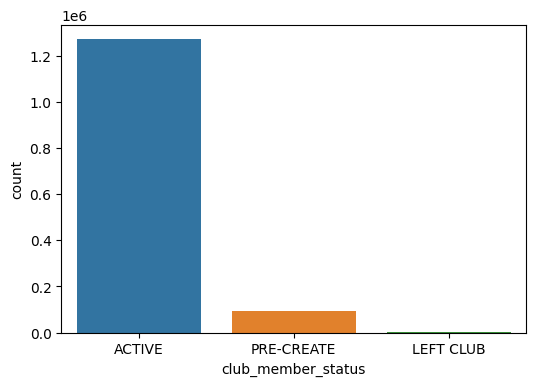

fashion_news_frequency : Number of unique values - 3
Distinct values in fashion_news_frequency: ['NONE' 'Regularly' nan 'Monthly']


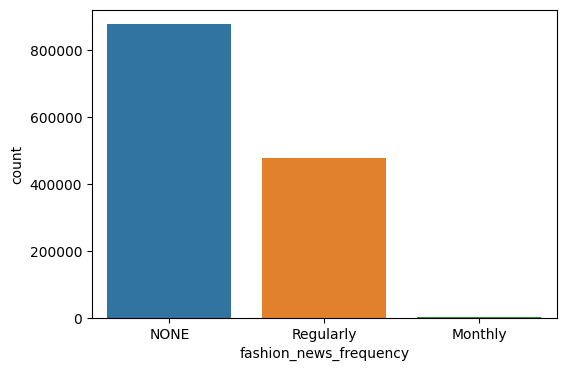

postal_code : Number of unique values - 352899


In [10]:
## let's check what are the distinct categories in each of the categorical fields 
### the distribution of data in each categories
for col in cat_column_names :
    print(f"{col} : Number of unique values - {customers_df[col].nunique()}")
    if customers_df[col].nunique() <10 : 
        print(f"Distinct values in {col}: {customers_df[col].unique()}")
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, data=customers_df)
        plt.show()
        
    

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


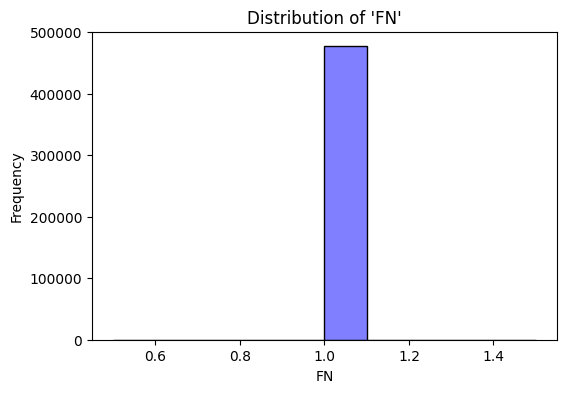

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


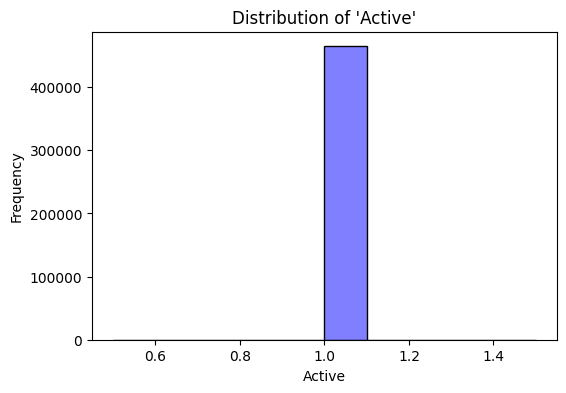

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


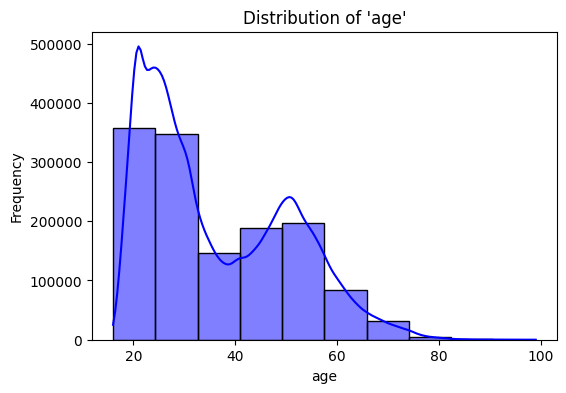

In [11]:
## Numerical columns , lets check the distribution of data
numerical_columns= [column for column in customers_df.select_dtypes(include=['float64', 'int64']).columns]

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(customers_df[column], kde=True, bins=10, color='blue')
    
    # Add title and labels
    plt.title(f"Distribution of '{column}'")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Show plot
    plt.show()

In [12]:
customers_df[FN_COLUMN].unique(),customers_df[ACTIVE_COLUMN].unique()


(array([nan,  1.]), array([nan,  1.]))

### Bivariant Analaysis
Lets look at the column FN and Active.  We have only a sigle value in both case , so lets replace all nul with zero


In [13]:
customers_df[FN_COLUMN]=customers_df[FN_COLUMN].fillna(0)
customers_df[ACTIVE_COLUMN]=customers_df[ACTIVE_COLUMN].fillna(0)

In [14]:

def bivariant_frquency(df,COLUMN,HUE):
    # Group the data by FN_COLUMN and ACTIVE_COLUMN to get counts
    category_counts =df.groupby([COLUMN, HUE]).size().reset_index(name='count')

    # Plot the barplot
    sns.barplot(data=category_counts, x=COLUMN, y='count', hue=HUE)

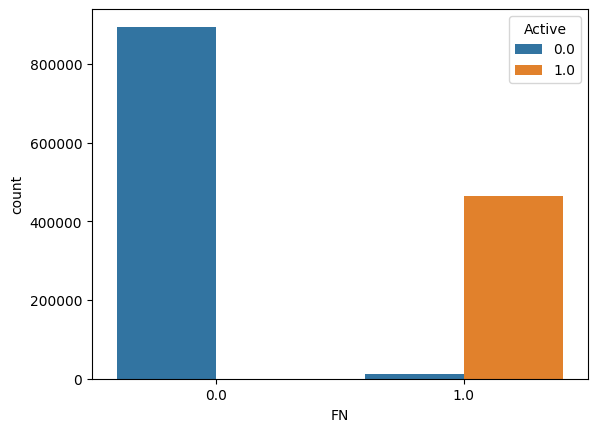

In [15]:
bivariant_frquency(df=customers_df,COLUMN=FN_COLUMN,HUE=ACTIVE_COLUMN)

There is a correlation , when FN is 0 active also 0 , when FN is one a small portion of active is zero.

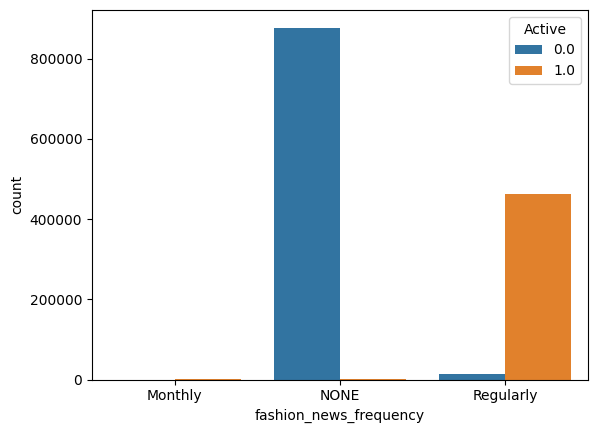

In [16]:
bivariant_frquency(df=customers_df,COLUMN=FSHN_NEWS_FREQ_COLUMN,HUE=ACTIVE_COLUMN)

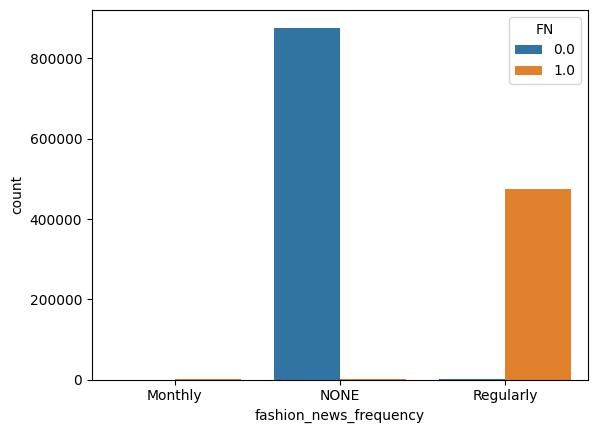

In [17]:
bivariant_frquency(df=customers_df,COLUMN=FSHN_NEWS_FREQ_COLUMN,HUE=FN_COLUMN)

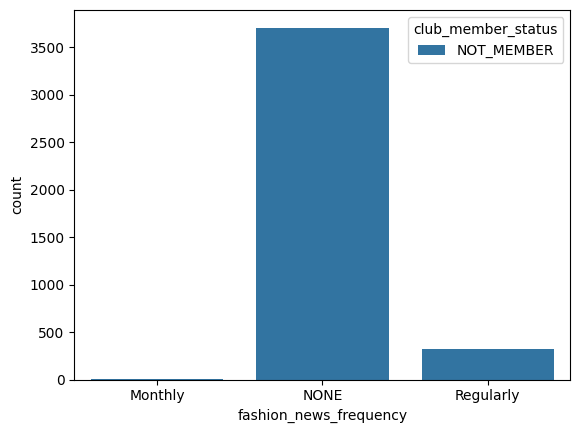

In [18]:
#lets fill the missing values in club with unknown 
customers_df[CLUB_MEM_STATUS_COLUMN]=customers_df[CLUB_MEM_STATUS_COLUMN].fillna("NOT_MEMBER")
bivariant_frquency(df=customers_df[customers_df[CLUB_MEM_STATUS_COLUMN]=="NOT_MEMBER"],COLUMN=FSHN_NEWS_FREQ_COLUMN,HUE=CLUB_MEM_STATUS_COLUMN)

Plot there is correlation betwwen the categorical columns. So we can do a correlation check and decide which columns to drop or keep. But before doing that lets  handle the missing values

In [19]:
customers_df.isnull().mean() * 100

customer_id               0.000000
FN                        0.000000
Active                    0.000000
club_member_status        0.000000
fashion_news_frequency    1.167000
age                       1.156066
postal_code               0.000000
dtype: float64

### Analysis on missing values

In [20]:
missing_val_columns=[column for column in customers_df.columns if customers_df[column].isnull().sum()>0]
missing_val_columns

['fashion_news_frequency', 'age']

we can easily conclude that unknown in club member staus is they are not a member in club and  with fashion news fewquency they are not subcribing fashion news. Now we need to analyse missing values in age

In [21]:
## lets replace missing values in fashion news frequency and club member status
customers_df[CLUB_MEM_STATUS_COLUMN]=customers_df[CLUB_MEM_STATUS_COLUMN].fillna("NOT_MEMBER")
customers_df[FSHN_NEWS_FREQ_COLUMN]=customers_df[CLUB_MEM_STATUS_COLUMN].fillna("NONE")


## Age analysis

In [22]:
customers_df["age"].min(),customers_df["age"].max()


(16.0, 99.0)

Lets make age as a catogory. This with the assumption that all teens will be  instersted in similar items , all people age between 25-35 has similar intersts and so on
So the categories which we gonna consider will be:
- 0-12  if any
- 13- 25 
- 25 -35
- 35- 55
- 55 - 100
we may need to split or merge some categories in this again. But lets consider this now


In [23]:
bins = [ 13, 25, 35, 55, 100]
labels = ['13-25', '25-35', '35-55', '55-100']
customers_df[AGE_GRP_COLUMN] = pd.cut(customers_df[AGE_COLUMN], bins=bins, labels=labels, right=False)

In [24]:
customers_df[AGE_GRP_COLUMN].unique()

['35-55', '25-35', '13-25', NaN, '55-100']
Categories (4, object): ['13-25' < '25-35' < '35-55' < '55-100']

In [25]:
customers_df[AGE_GRP_COLUMN].isnull().sum()/len(customers_df[AGE_GRP_COLUMN]) ## we can find the age group by checking the purchase historya nd based on what they like, but time being lets drop it as its a small pecertage of data

0.011560664149623172

In [26]:
print(customers_df.shape)
customers_df=customers_df.dropna()
customers_df.shape

(1371980, 8)


(1356119, 8)

In [27]:
customers_df[ZIP_COLUMN].nunique()
##  demographic info is useful . We just want the high level data. not a detailed version. Lets drop that too

351826

In [28]:
customers_df=customers_df.drop(columns=[AGE_COLUMN,ZIP_COLUMN])

In [29]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age_group
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,ACTIVE,35-55
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,ACTIVE,25-35
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,ACTIVE,13-25
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,ACTIVE,35-55
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,ACTIVE,35-55


In [30]:
## One hot encoding
customers_df = pd.get_dummies(customers_df, columns=[CLUB_MEM_STATUS_COLUMN,FSHN_NEWS_FREQ_COLUMN,AGE_GRP_COLUMN], drop_first=True)

In [31]:
customers_df.head()

,customer_id,FN,Active,club_member_status_LEFT CLUB,club_member_status_NOT_MEMBER,club_member_status_PRE-CREATE,fashion_news_frequency_LEFT CLUB,fashion_news_frequency_NOT_MEMBER,fashion_news_frequency_PRE-CREATE,age_group_25-35,age_group_35-55,age_group_55-100
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,False,False,False,False,False,False,False,True,False
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,False,False,False,False,False,False,True,False,False
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,False,False,False,False,False,False,False,False,False
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,False,False,False,False,False,False,False,True,False
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,False,False,False,False,False,False,False,True,False


In [32]:
customers_df.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status_LEFT CLUB',
       'club_member_status_NOT_MEMBER', 'club_member_status_PRE-CREATE',
       'fashion_news_frequency_LEFT CLUB', 'fashion_news_frequency_NOT_MEMBER',
       'fashion_news_frequency_PRE-CREATE', 'age_group_25-35',
       'age_group_35-55', 'age_group_55-100'],
      dtype='object')

In [33]:
selected_columns=[ 'FN', 'Active', 'club_member_status_LEFT CLUB',
       'club_member_status_NOT_MEMBER', 'club_member_status_PRE-CREATE',
       'fashion_news_frequency_LEFT CLUB', 'fashion_news_frequency_NOT_MEMBER',
       'fashion_news_frequency_PRE-CREATE', 'age_group_25-35',
       'age_group_35-55', 'age_group_55-100']

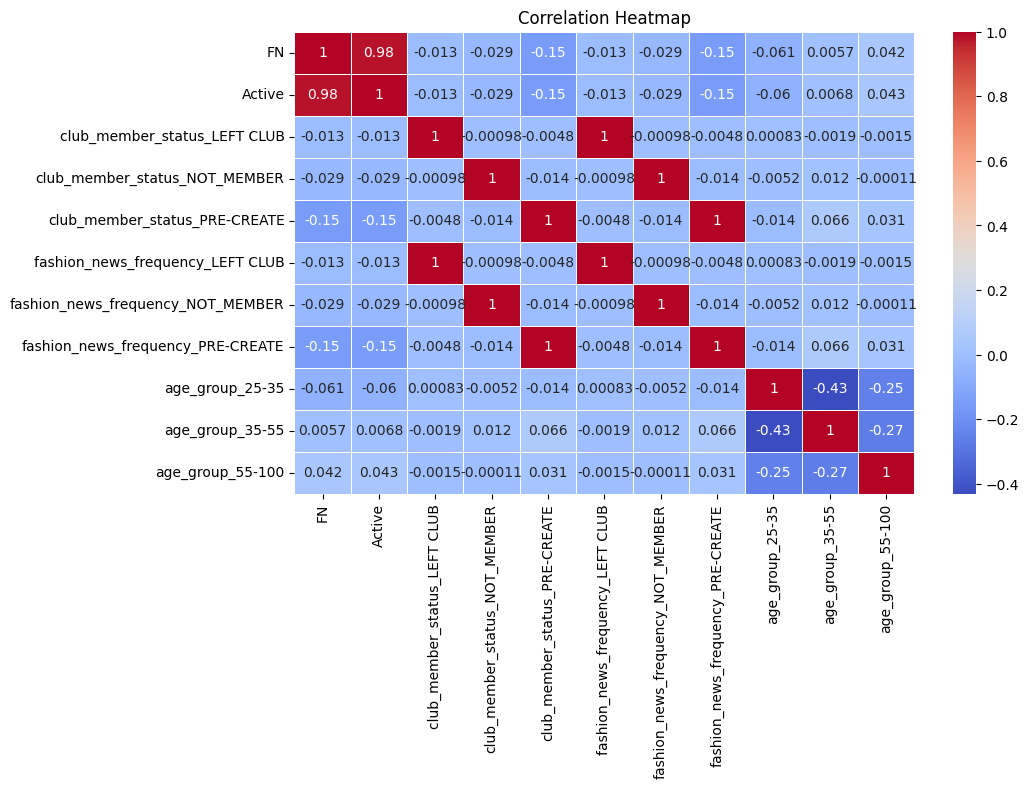

In [34]:
correlation_matrix = customers_df[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

columns FN and active are highly correlated , so lets drop one



In [35]:
customers_df=customers_df.drop(columns=[FN_COLUMN])

In [36]:
## We can add more details to customer data metadata, especially like demographic anf genter preference etc. But right now from given data 
## this is the final cleaned data for customer attributes
customers_df.head()

,customer_id,Active,club_member_status_LEFT CLUB,club_member_status_NOT_MEMBER,club_member_status_PRE-CREATE,fashion_news_frequency_LEFT CLUB,fashion_news_frequency_NOT_MEMBER,fashion_news_frequency_PRE-CREATE,age_group_25-35,age_group_35-55,age_group_55-100
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,False,False,False,False,False,False,False,True,False
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,False,False,False,False,False,False,True,False,False
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,False,False,False,False,False,False,False,False,False
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,False,False,False,False,False,False,False,True,False
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,False,False,False,False,False,False,False,True,False


## Conclusions Customer:
Transformation required:
- fill nan in active with zero assuming they are not active
- fill nan in club member stsus with  NOT_A_MEMBER
- fill nan in 	fashion_news_frequency with NONE
- drop FN because its highly correlated to active
- catogorize age 
- drop postal_code

In [37]:
print("Articles Data")
print(f"number of rows in articles dataframe {articles.shape[0]}")
print(f"number of column in articles dataframe {articles.shape[1]}")
print("Columns & Data Types")
print(articles.dtypes)

Articles Data
number of rows in articles dataframe 105542
number of column in articles dataframe 25
Columns & Data Types
article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no     

In [64]:
ARTICLE_ID='article_id'  
PRODUCT_CODE='product_code'
PRODUCT_NAME= 'prod_name'
PRODUCT_TYPE_NO='product_type_no'
PRODUCT_GRP_NAME='product_group_name'


In [48]:
## Asumming ariticle id is the key , lets verifiy that
len(articles[ARTICLE_ID])==articles.shape[0],articles.shape

(True, (105542, 25))

In [49]:
## what is the difference between aricle id and product code , is product code is unique
len(articles[ARTICLE_ID].unique()),len(articles[PRODUCT_CODE].unique()),len(articles[PRODUCT_NAME].unique())

(105542, 47224, 45875)

In [44]:
#Does the customers data contains null values ?
articles.isnull().sum()/len(articles)*100

article_id                      0.000000
product_code                    0.000000
prod_name                       0.000000
product_type_no                 0.000000
product_type_name               0.000000
product_group_name              0.000000
graphical_appearance_no         0.000000
graphical_appearance_name       0.000000
colour_group_code               0.000000
colour_group_name               0.000000
perceived_colour_value_id       0.000000
perceived_colour_value_name     0.000000
perceived_colour_master_id      0.000000
perceived_colour_master_name    0.000000
department_no                   0.000000
department_name                 0.000000
index_code                      0.000000
index_name                      0.000000
index_group_no                  0.000000
index_group_name                0.000000
section_no                      0.000000
section_name                    0.000000
garment_group_no                0.000000
garment_group_name              0.000000
detail_desc     

.39% of Detailed Description data is missing. This is a very small portion of the data, ethier we can jut drop those rows aor we can just use "UNKNOWN" to replace nulls

In [53]:
for column in articles.columns:
    print(f"{column}: {articles[column].nunique()}")

article_id: 105542
product_code: 47224
prod_name: 45875
product_type_no: 132
product_type_name: 131
product_group_name: 19
graphical_appearance_no: 30
graphical_appearance_name: 30
colour_group_code: 50
colour_group_name: 50
perceived_colour_value_id: 8
perceived_colour_value_name: 8
perceived_colour_master_id: 20
perceived_colour_master_name: 20
department_no: 299
department_name: 250
index_code: 10
index_name: 10
index_group_no: 5
index_group_name: 5
section_no: 57
section_name: 56
garment_group_no: 21
garment_group_name: 21
detail_desc: 43404


We have 132 product type and 19 product groups and 45875  product names. Lets see how amny product_names comes under an product group

In [65]:
code_type_count = articles.groupby([PRODUCT_CODE])[PRODUCT_GRP_NAME].nunique()

# Check if any product_code has more than one unique product_type
multiple_types = code_type_count[code_type_count > 1]

# Display the result
if multiple_types.empty:
    print("The relationship is one-to-one. Each product code is assigned to only one product type.")
else:
    print(f"The following product codes are assigned to multiple product types:\n{multiple_types}")

The following product codes are assigned to multiple product types:
product_code
148033    2
156224    2
156231    2
294008    2
297067    2
         ..
915101    2
916425    2
916926    2
919896    2
933989    2
Name: product_group_name, Length: 96, dtype: int64


In [63]:
code_type_count.unique()


array([1, 2])

There cases where one product code is applied to multiple product types

In [ ]:
code_type_count = articles.groupby([PRODUCT_TYPE_NO])[PRODUCT_TYPE_NO].nunique()

# Check if any product_code has more than one unique product_type
multiple_types = code_type_count[code_type_count > 1]

# Display the result
if multiple_types.empty:
    print("The relationship is one-to-one. Each product code is assigned to only one product type.")
else:
    print(f"The following product codes are assigned to multiple product types:\n{multiple_types}")

In [66]:
code_type_count

product_code
108775    1
110065    1
111565    1
111586    1
111593    1
         ..
953450    1
953763    1
956217    1
957375    1
959461    1
Name: product_group_name, Length: 47224, dtype: int64